# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning

warnings.filterwarnings('ignore', category=UndefinedMetricWarning)


In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [3]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename)

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

    I have chosen to use the 'airbnbListingsData.csv' dataset. The label I will be predicting is the 'review_scores_value' column. This will be a multiclass classification supervised learning problem, as it will look at the given features and predict which out of 4 rating classes Airbnb will be ranked. The feature of this problem includes all numerical data columns and the 'amenities' column. This can be an important predictive model as review_scores_value can significantly enhance the user experience, support hosts, optimize pricing, and ultimately drive growth and competitive advantage for Airbnb. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
df.describe()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
count,16179.000000,16909.000000,28022.000000,28022.000000,28022.000000,28022.000000,25104.000000,26668.000000,28022.000000,28022.000000,...,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000
mean,0.906901,0.791953,14.554778,14.554778,2.874491,1.142174,1.329708,1.629556,154.228749,18.689387,...,4.814300,4.808041,4.750393,4.647670,9.581900,5.562986,3.902077,0.048283,1.758325,5.169510
std,0.227282,0.276732,120.721287,120.721287,1.860251,0.421132,0.700726,1.097104,140.816605,25.569151,...,0.438603,0.464585,0.415717,0.518023,32.227523,26.121426,17.972386,0.442459,4.446143,2.028497
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,29.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000,1.000000
25%,0.940000,0.680000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,70.000000,2.000000,...,4.810000,4.810000,4.670000,4.550000,1.000000,0.000000,0.000000,0.000000,0.130000,4.000000
50%,1.000000,0.910000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,115.000000,30.000000,...,4.960000,4.970000,4.880000,4.780000,1.000000,1.000000,0.000000,0.000000,0.510000,5.000000
75%,1.000000,1.000000,3.000000,3.000000,4.000000,1.000000,1.000000,2.000000,180.000000,30.000000,...,5.000000,5.000000,5.000000,5.000000,3.000000,1.000000,1.000000,0.000000,1.830000,7.000000
max,1.000000,1.000000,3387.000000,3387.000000,16.000000,8.000000,12.000000,21.000000,1000.000000,1250.000000,...,5.000000,5.000000,5.000000,5.000000,421.000000,308.000000,359.000000,8.000000,141.000000,13.000000


In [5]:
df.columns

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',

In [6]:
df.dtypes

name                                             object
description                                      object
neighborhood_overview                            object
host_name                                        object
host_location                                    object
host_about                                       object
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                  bool
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                               bool
host_identity_verified                             bool
neighbourhood_group_cleansed                     object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

After reviewing the data I still wish to keep all numerical data and remove any str/object data except for the 'amenities' data. In order to prepare my data for modeling I will process and vectorize the amenities column to transform it into workable numerical data, using the TfidfVectorizer. Additionally, I will drop all of the non-numerical data from there on, and fill in any missing data using the mean value of each column. For this task, I will use the RandomForestClassifier(). I will use a 33-66 split on the data to train and use a classification_report, accuracy_score, and confusion_matrix to analyze the performance of the data. Then I will use a GridSearchCV to train multiple models and see which set of parameters is best to use to improve the performance of the model!

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Preprocess 'amenities' column
df['amenities'] = df['amenities'].apply(lambda x: ','.join([amenity.replace(' ', '_') for amenity in x.split(',')]))

# Apply TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=100)
amenities_tfidf = tfidf_vectorizer.fit_transform(df['amenities'])
amenities_df = pd.DataFrame(amenities_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Combine processed 'amenities' with the rest of the data
filtered_df = df.drop(columns=['amenities'])
processed_df = pd.concat([filtered_df, amenities_df], axis=1)

# Drop non-numeric columns
non_numeric_columns = processed_df.select_dtypes('object').columns.tolist()
processed_df.drop(columns=non_numeric_columns, inplace=True)

# Handle missing values in numerical columns
for column in processed_df.columns:
    mean_value = processed_df[column].mean()
    processed_df[column].fillna(mean_value, inplace=True)

# Check for any remaining NaN values
nan_count = np.sum(processed_df.isnull(), axis=0)
print(nan_count)

host_response_rate           0
host_acceptance_rate         0
host_is_superhost            0
host_listings_count          0
host_total_listings_count    0
                            ..
washer                       0
wifi                         0
window_ac_unit               0
window_guards                0
wine_glasses                 0
Length: 141, dtype: int64


## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [8]:
pip install imblearn


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from collections import Counter
from imblearn.over_sampling import SMOTE
from matplotlib.colors import LogNorm

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [10]:

# Split the data into features and target
X = processed_df.drop(columns=['review_scores_value'])
y = processed_df['review_scores_value'].astype(int)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print("Before removing class 0:", Counter(y_train))

# Remove class 0 from the training data
X_train, y_train = X_train[y_train != 0], y_train[y_train != 0]

# Print the class distribution after removal
print("After removing class 0:", Counter(y_train))

# Apply SMOTE to the training data with k_neighbors=1
smote = SMOTE(random_state=42, k_neighbors=1)
X_train2, y_train2 = smote.fit_resample(X_train, y_train)

# Print the class distribution after oversampling
print("After SMOTE:", Counter(y_train2))


Before removing class 0: Counter({4: 12889, 5: 5036, 3: 594, 1: 133, 2: 121, 0: 1})
After removing class 0: Counter({4: 12889, 5: 5036, 3: 594, 1: 133, 2: 121})
After SMOTE: Counter({3: 12889, 4: 12889, 5: 12889, 2: 12889, 1: 12889})


Staring...
Done
Accuracy: 0.8362889273356401
Confusion Matrix:



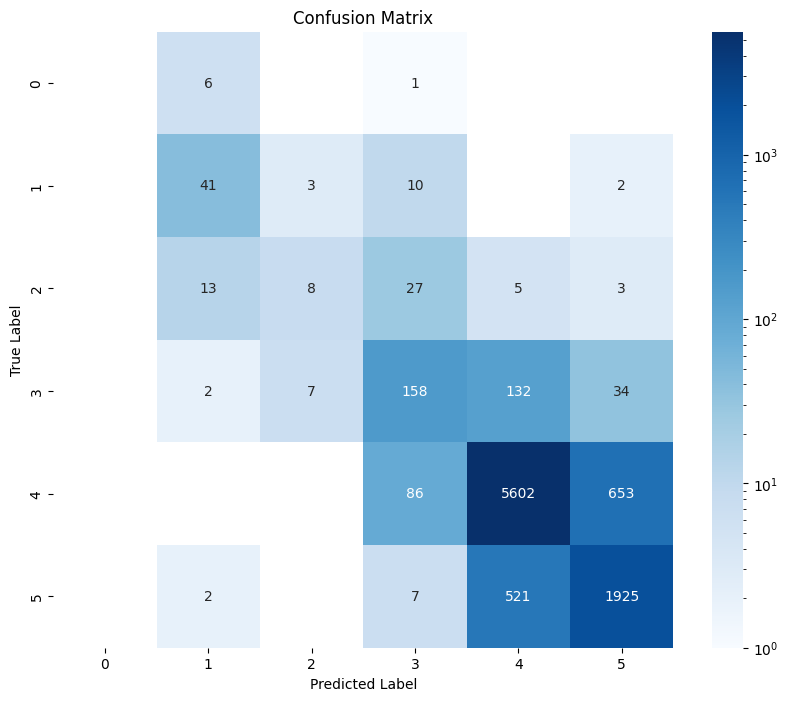

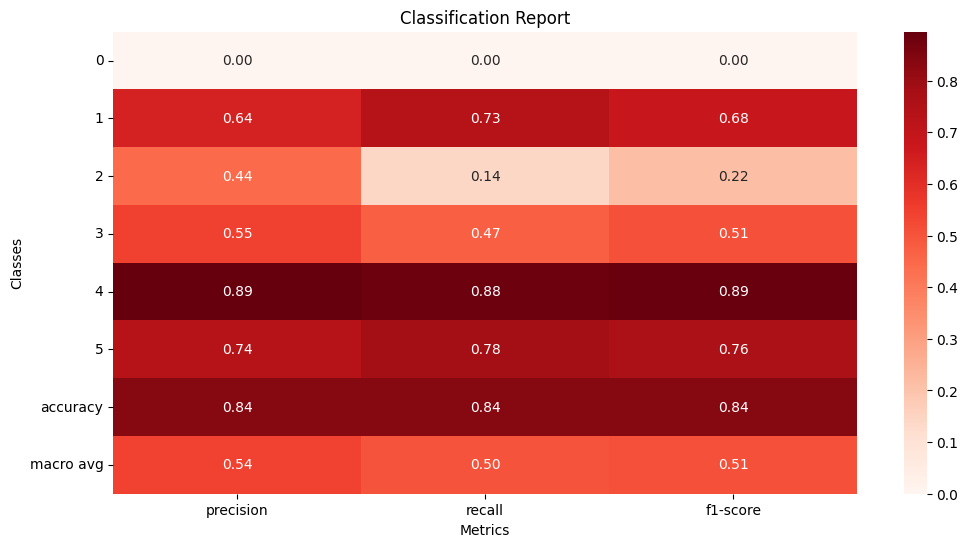

In [11]:
print("Staring...")
rf_classifier = RandomForestClassifier(n_estimators=100,random_state=42)
rf_classifier.fit(X_train2, y_train2)
y_pred = rf_classifier.predict(X_test)
print("Done")
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n")
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['0', '1', '2', '3', '4', '5'], 
            yticklabels=['0', '1', '2', '3', '4', '5'],
            norm=LogNorm())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Convert report to DataFrame for better visualization
report_df = pd.DataFrame(report).transpose()

# Plot classification report
plt.figure(figsize=(12, 6))
sns.heatmap(report_df.iloc[:-1, :-1].astype(float), annot=True, cmap='Reds', fmt='.2f',
            xticklabels=report_df.columns[:-1], yticklabels=report_df.index[:-1])
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.title('Classification Report')
plt.show()

The `RandomForestClassifier` achieved an accuracy of around 83.62%, performing well overall but with varying results across different classes. It used 200 trees (n_estimators), a maximum depth of 30 (max_depth), and minimal requirements for splitting and leaf nodes. The model excelled with classes 4 and 5, while struggling with classes 0 and 2, as shown by poor precision and recall for these classes. The classification report and confusion matrix highlighted strong performance for some classes but suggested a need for further tuning, possibly including addressing class imbalance and refining features.

### Grid Search takes a long time to run, but the code cell after the one below contains the best params after it is run

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train2, y_train2)

# Retrieve the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n")
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['0', '1', '2', '3', '4', '5'], 
            yticklabels=['0', '1', '2', '3', '4', '5'],
            norm=LogNorm())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Convert report to DataFrame for better visualization
report_df = pd.DataFrame(report).transpose()

# Plot classification report
plt.figure(figsize=(12, 6))
sns.heatmap(report_df.iloc[:-1, :-1].astype(float), annot=True, cmap='Reds', fmt='.2f',
            xticklabels=report_df.columns[:-1], yticklabels=report_df.index[:-1])
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.title('Classification Report')
plt.show()


Best Parameters: n_estimators=200, max_depth= 30, min_samples_split= 2, min_samples_leaf = 1
Staring...
Done
Accuracy: 0.83780276816609
Confusion Matrix:



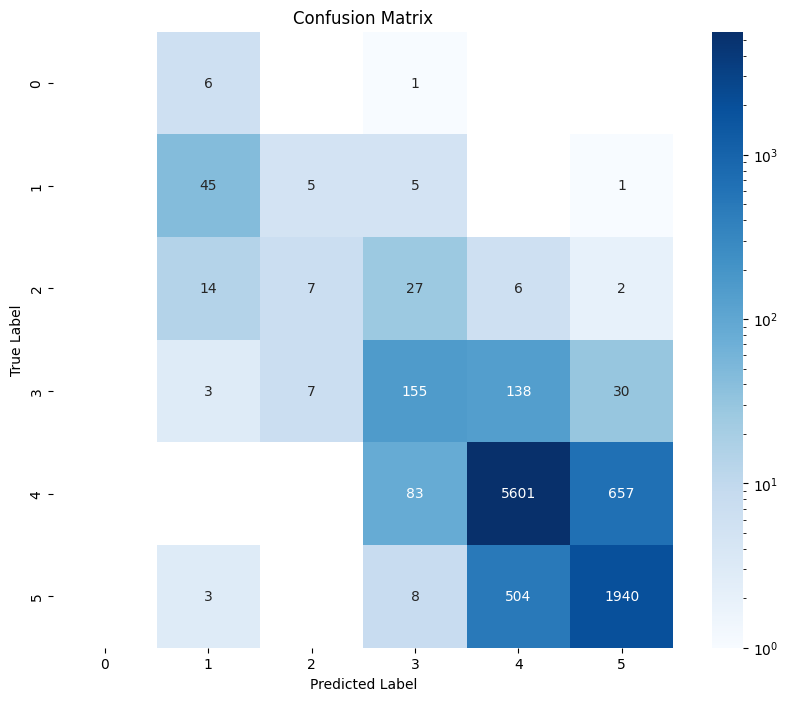

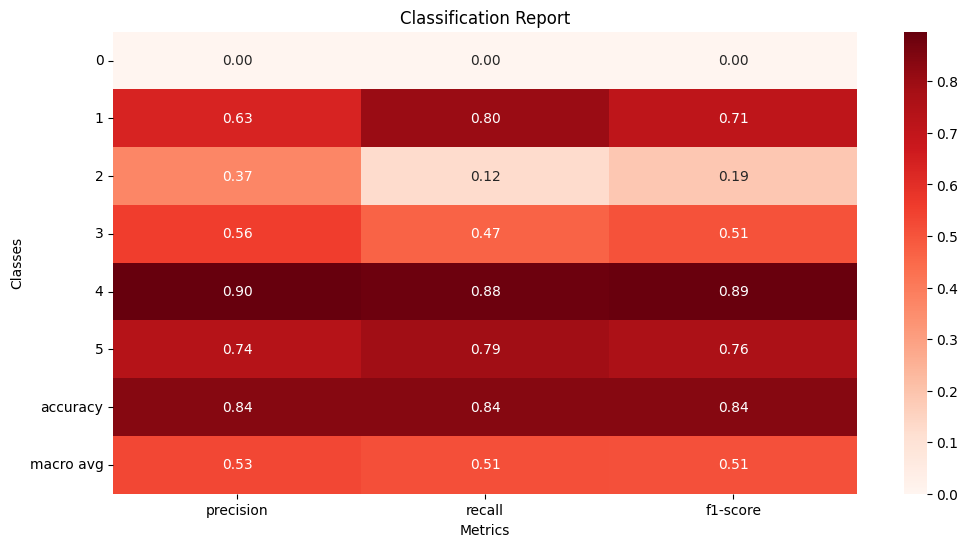

In [13]:
print("Best Parameters: n_estimators=200, max_depth= 30, min_samples_split= 2, min_samples_leaf = 1")
print("Staring...")
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth= 30, min_samples_split= 2, min_samples_leaf = 1, random_state=42)
rf_classifier.fit(X_train2, y_train2)
y_pred = rf_classifier.predict(X_test)
print("Done")
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n")
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['0', '1', '2', '3', '4', '5'], 
            yticklabels=['0', '1', '2', '3', '4', '5'],
            norm=LogNorm())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Convert report to DataFrame for better visualization
report_df = pd.DataFrame(report).transpose()

# Plot classification report
plt.figure(figsize=(12, 6))
sns.heatmap(report_df.iloc[:-1, :-1].astype(float), annot=True, cmap='Reds', fmt='.2f',
            xticklabels=report_df.columns[:-1], yticklabels=report_df.index[:-1])
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.title('Classification Report')
plt.show()


Overall we see similar results from the `RandomForestClassifier`, as it achieved an accuracy of approximately 83.78%. The confusion matrix shows that the model performed well for classes 4 and 5, with high precision and recall. However, it struggled with class 0 and class 2, showing poor performance in these categories. The classification report indicates that class 4 had the highest scores, while class 0 and class 2 had significantly lower precision and recall. The macro average scores reflect moderate overall performance, while the weighted averages confirm good performance overall, emphasizing the need for further improvements, especially for underperforming classes. In order to improve the model, I believe collecting more data on airbnbs with review scores of 0, 1, 2, and 3 will greatly help the model better generalize and understand which feature correlates best with what label classification.